In [ ]:
import pandas as pd
import numpy as np
# 设置matplotlib字体为Times New Roman
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['font.family'] = 'serif'
plt.rcParams['axes.unicode_minus'] = False

# 读取数据
df_sita=pd.read_excel('合并_关键词得分汇总.xlsx')
df_total=pd.read_csv('EV2&MV&PB&TotalAsset.csv')

In [18]:
#df=df_total.loc[df_total["asharevalue_stat_symbol"] == "600028.SH"][-11:]["asharevalue_ev2"]
#df=df_total.loc[df_total["asharevalue_stat_symbol"] == "002594.SZ"][-11:]["asharevalue_ev2"]
df=df_total.loc[df_total["asharevalue_stat_symbol"] == "002230.SZ"][-11:]["asharevalue_ev2"]


In [3]:
sita=pd.read_excel('合并_关键词得分汇总.xlsx')
sita

,stock_id,stock_name,year,关键词得分(%)_总和,总分词数
0,1,平安银行,2014,0.035355,38311
1,1,平安银行,2015,0.065779,36503
2,1,平安银行,2016,0.054636,34884
3,1,平安银行,2017,0.062643,37719
4,1,平安银行,2018,0.080308,48356
...,...,...,...,...,...
34502,900957,XXXX,2014,0.039470,17534
34503,900957,XXXX,2015,0.032106,18886
34504,900957,XXXX,2017,0.054248,19253
34505,900957,XXXX,2018,0.060726,20179


In [19]:
df

13134    2.027818e+10
15719    4.542865e+10
18520    3.386455e+10
21543    8.098907e+10
25002    5.154737e+10
28559    7.365459e+10
32302    8.939286e+10
36343    1.190782e+11
40972    7.487846e+10
45879    1.088170e+11
50961    1.177520e+11
Name: asharevalue_ev2, dtype: float64

In [20]:
#23年再往前取10个
sl=sita[sita['stock_id']==2230]['关键词得分(%)_总和'][-10:].values
sl

array([0.07422301, 0.0905937 , 0.10490836, 0.11808891, 0.12943789,
       0.10754383, 0.11277617, 0.10919534, 0.09768969, 0.13355248])

In [21]:
extended_sl = 1-np.concatenate([
    sl,                            # 原始数组
    # 末尾添加的1个值
    #np.array([0.040869227149405])#比亚迪
    #np.array([0.125580161])#中国石化       
    np.array([0.158201213])#科大讯飞
])

In [22]:
s=extended_sl*df.values
c=pd.DataFrame(s)
c.columns=['NDAT']
c

,NDAT
0,1.877308e+10
1,4.131310e+10
2,3.031188e+10
3,7.142516e+10
4,4.487519e+10
5,6.573349e+10
6,7.931148e+10
7,1.060754e+11
8,6.756360e+10
9,9.428418e+10


In [108]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(s, order=(3,0,3))
results = model.fit()

# 预测未来 3 年(周期)
forecast = results.forecast(steps=3)
forecast

/Users/wangb2/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


array([9.35302330e+10, 8.20858616e+10, 8.31453154e+10])

In [23]:
a = np.concatenate([s, forecast])
a

array([1.87730754e+10, 4.13130981e+10, 3.03118798e+10, 7.14251595e+10,
       4.48751917e+10, 6.57334899e+10, 7.93114794e+10, 1.06075434e+11,
       6.75636034e+10, 9.42841799e+10, 9.91235027e+10, 9.35231493e+11,
       9.20502270e+11, 9.61739821e+11])

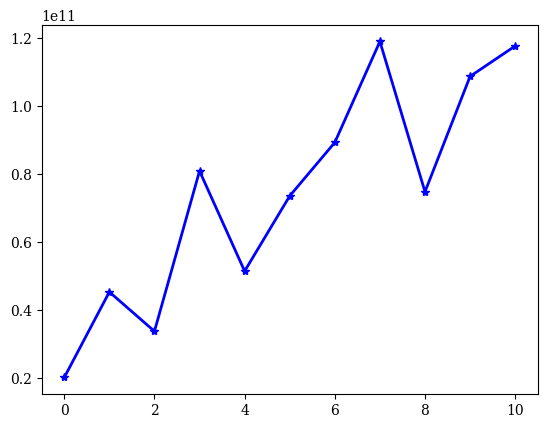

In [24]:
df.index=range(len(df))
plt.plot( df, 'b*-', label='Actual values', linewidth=2)

In [42]:
results.forecast(steps=1)

array([1.11712565e+11])

In [39]:
results.predict()

array([0.00000000e+00, 1.09923783e+10, 3.68439016e+10, 3.91028690e+10,
       7.04784268e+10, 7.41022080e+10, 6.99177366e+10, 9.51898874e+10,
       8.53833867e+10, 1.00676577e+11, 9.47909079e+10])

In [44]:
in_sample_predictions = results.fittedvalues
in_sample_predictions

array([0.00000000e+00, 1.09923783e+10, 3.68439016e+10, 3.91028690e+10,
       7.04784268e+10, 7.41022080e+10, 6.99177366e+10, 9.51898874e+10,
       8.53833867e+10, 1.00676577e+11, 9.47909079e+10])

$$下面都是画图验证$$

R² (决定系数): 0.4631
MSE (均方误差): 403523039191019290624.0000
RMSE (均方根误差): 20087882894.6960
MAE (平均绝对误差): 15568247888.7438
AIC: 570.8767
BIC: 574.0599


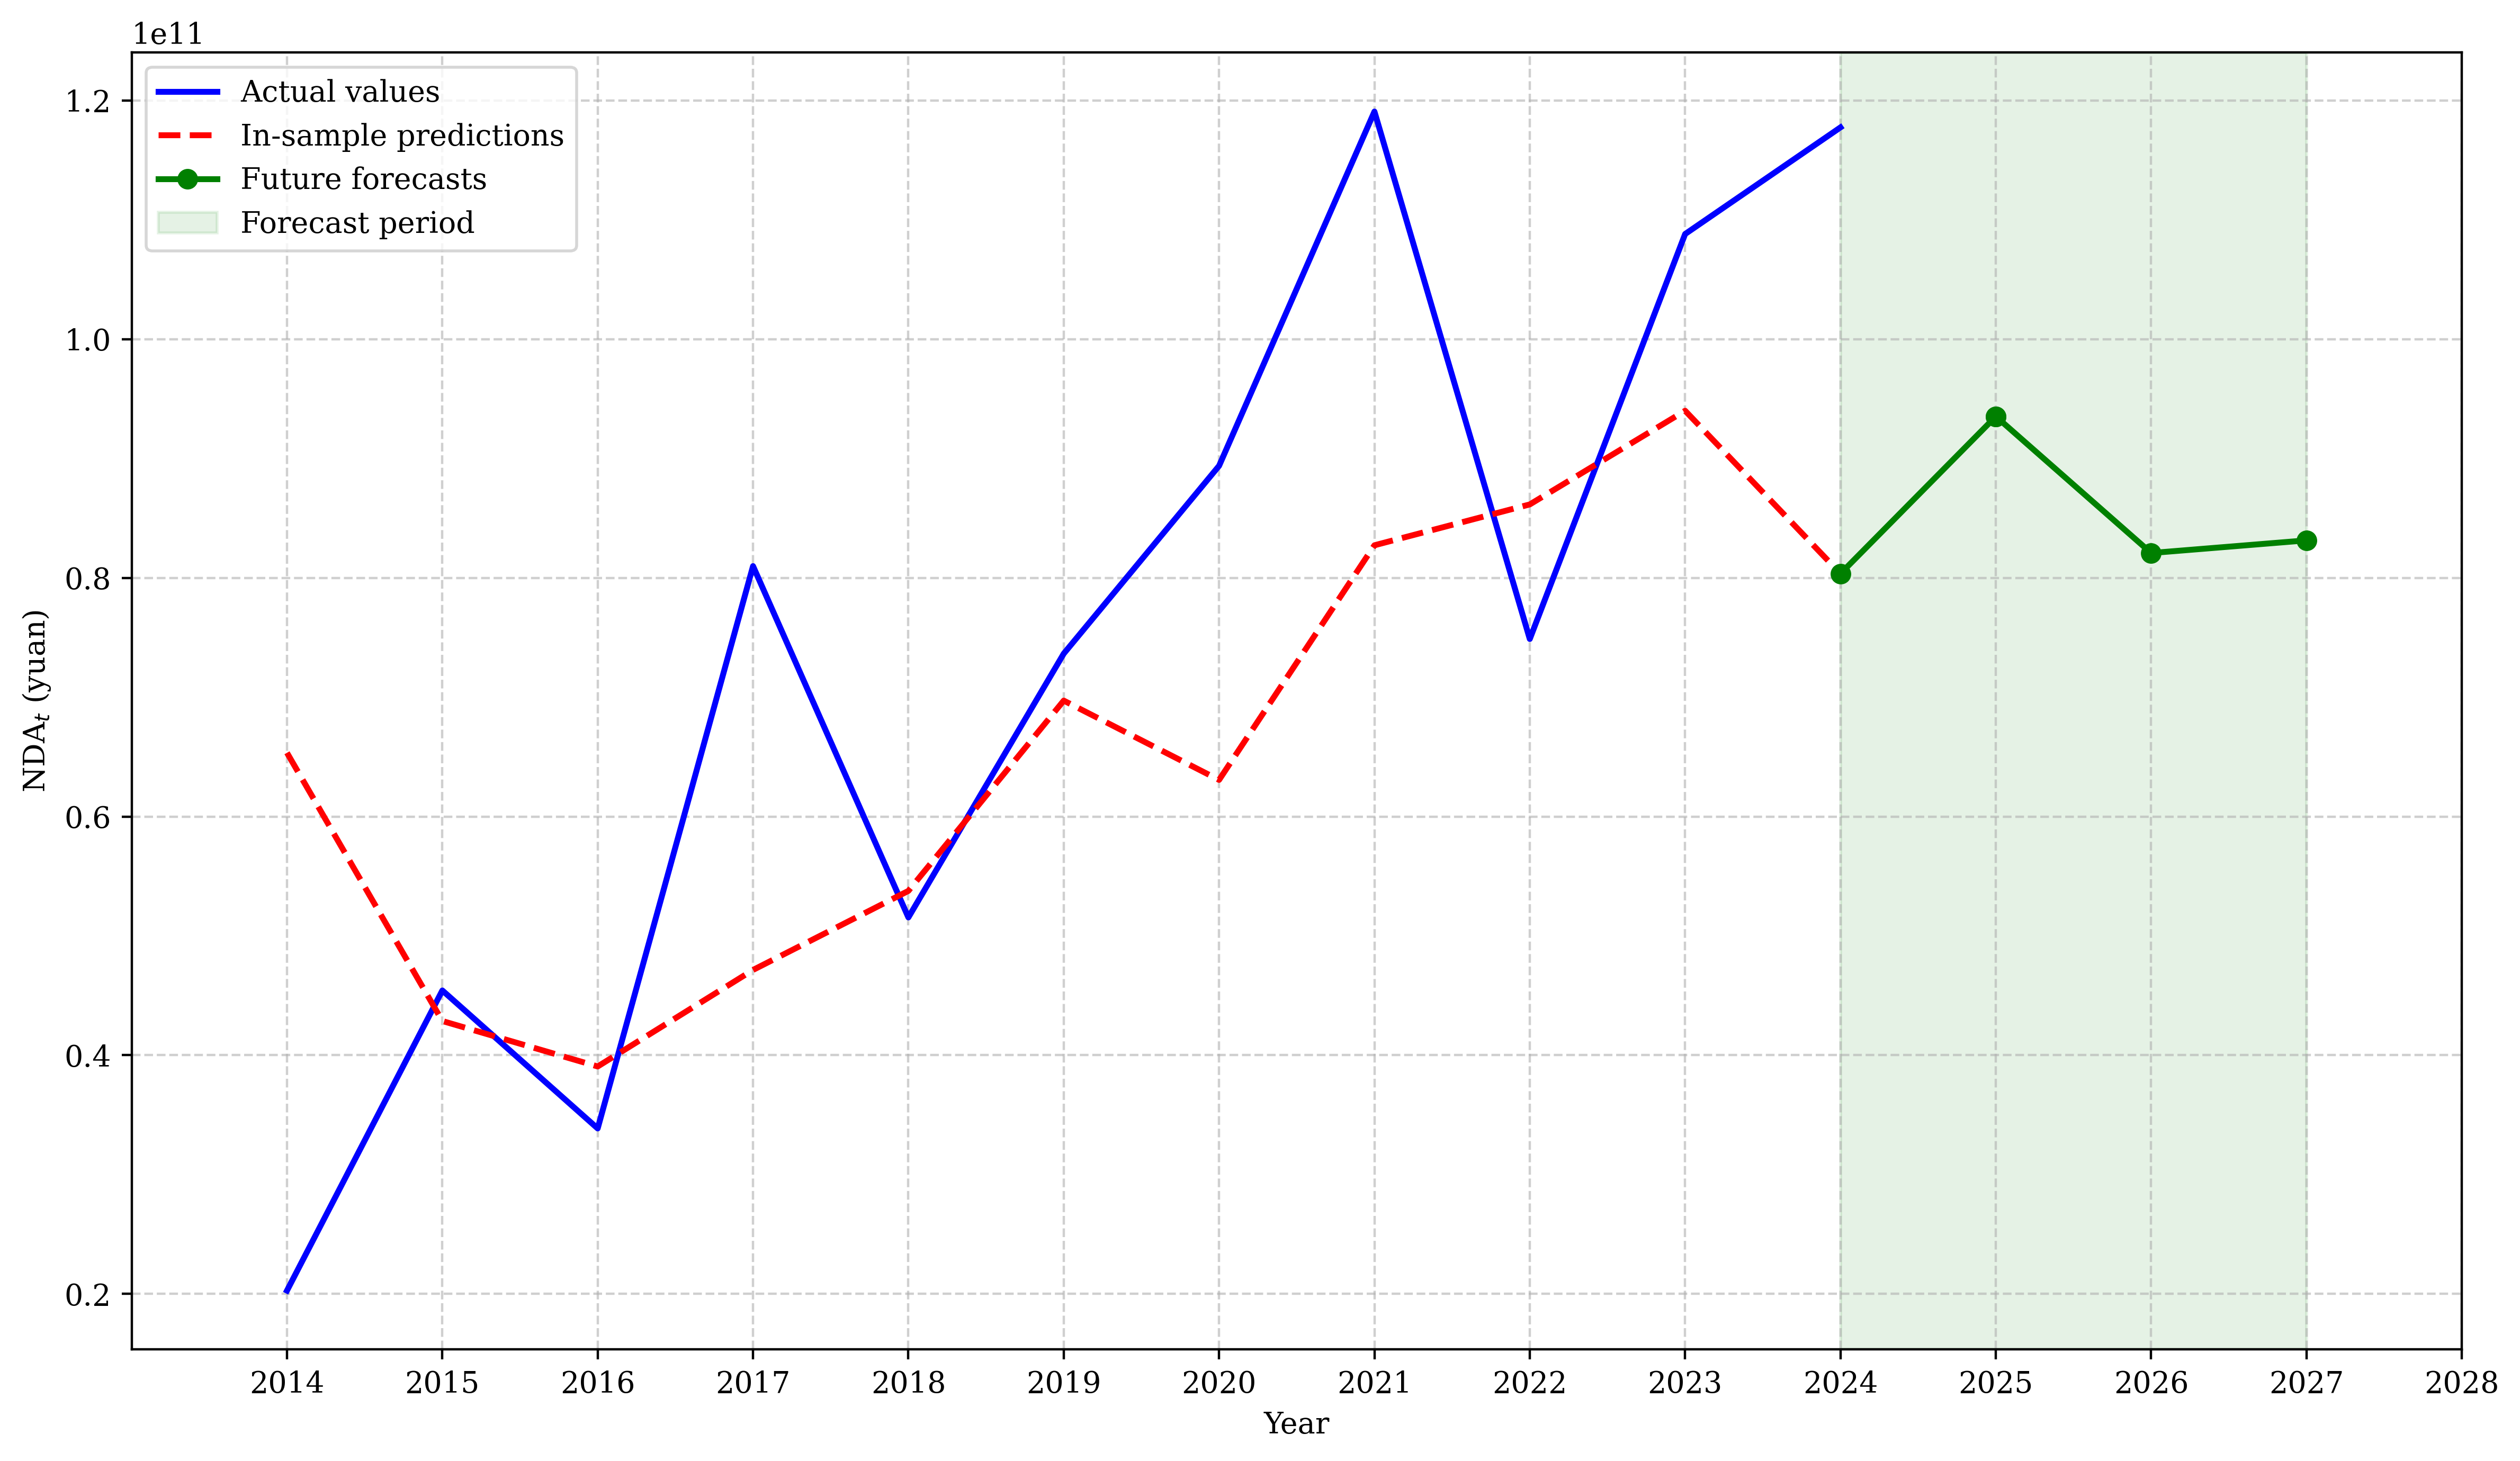

In [109]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['font.family'] = 'serif'
# 获取模型内样本预测值
in_sample_predictions = results.predict(start=df.index[0], end=df.index[-1])

# 计算各种拟合优度指标
r2 = r2_score(s[0:], in_sample_predictions[0:])
mse = mean_squared_error(s[0:], in_sample_predictions[0:])
rmse = np.sqrt(mse)
mae = mean_absolute_error(s[0:], in_sample_predictions[0:])

# 获取 AIC 和 BIC
aic = results.aic
bic = results.bic

print(f"R² (决定系数): {r2:.4f}")
print(f"MSE (均方误差): {mse:.4f}")
print(f"RMSE (均方根误差): {rmse:.4f}")
print(f"MAE (平均绝对误差): {mae:.4f}")
print(f"AIC: {aic:.4f}")
print(f"BIC: {bic:.4f}")

# 可视化拟合效果 + 未来预测
plt.figure(figsize=(12, 7), dpi=400)

# 创建2013-2027年的年份标签
years = np.arange(2014, 2029)
historical_years = years[:len(df)]  # 历史数据年份
forecast_years = years[len(df):len(df)+3]  # 预测年份

# 1. 绘制历史实际值
plt.plot(historical_years, df, 'b-', label='Actual values', linewidth=2)

# 2. 绘制样本内预测值
plt.plot(historical_years, in_sample_predictions, 'r--', label='In-sample predictions', linewidth=2)

# 3. 绘制未来预测值
plt.plot(forecast_years, forecast, 'g-o', label='Future forecasts', linewidth=2, markersize=6)

# 添加预测区域的阴影
plt.axvspan(historical_years[-1], forecast_years[-1], alpha=0.1, color='green', label='Forecast period')

# 连接样本内预测的最后一点和未来预测的第一点
plt.plot([historical_years[-1], forecast_years[0]], [in_sample_predictions[-1], forecast[0]], 
         'g-o', linewidth=2)

# 增加预测值的数据标签
#for i, val in enumerate(forecast):
    #plt.text(forecast_years[i], val, f'{val:.2f}', ha='left', va='bottom', fontweight='bold')

# 图表装饰
plt.legend(loc='best')
#plt.title('ARIMA(5,1,6)模型拟合与预测')
plt.xlabel('Year')
#plt.ylabel('NDA (yuan)')
plt.ylabel(r'NDA$_t$ (yuan)')
plt.grid(True, linestyle='--', alpha=0.6)

# 设置X轴的刻度和范围
plt.xticks(np.arange(2014, 2029, step=1))
plt.xlim(2013, 2028)

plt.tight_layout()
plt.show()

In [25]:
from statsmodels.tsa.stattools import adfuller
def determine_d_parameter(series, max_d=2):
    """通过 ADF 测试确定差分阶数 d"""
    for d in range(max_d + 1):
        if d == 0:
            test_series = series
        else:
            test_series = series.diff(d).dropna()
        
        adf_result = adfuller(test_series)
        p_value = adf_result[1]
        
        print(f'差分阶数 d = {d}, ADF p值 = {p_value:.4f}')
        
        if p_value < 0.05:
            print(f'序列在差分 {d} 阶后平稳，建议 d = {d}')
            return d, test_series
determine_d_parameter(c["NDAT"], max_d=5)

差分阶数 d = 0, ADF p值 = 0.8483
差分阶数 d = 1, ADF p值 = 0.0001
序列在差分 1 阶后平稳，建议 d = 1


(1,
 1     2.254002e+10
 2    -1.100122e+10
 3     4.111328e+10
 4    -2.654997e+10
 5     2.085830e+10
 6     1.357799e+10
 7     2.676395e+10
 8    -3.851183e+10
 9     2.672058e+10
 10    4.839323e+09
 Name: NDAT, dtype: float64)

/var/folders/xb/w19tnpw50ss1zn5mdc9w75j80000gn/T/ipykernel_45577/2858078106.py:16: UserWarning: Glyph 33258 (\N{CJK UNIFIED IDEOGRAPH-81EA}) missing from current font.
  plt.tight_layout()
/var/folders/xb/w19tnpw50ss1zn5mdc9w75j80000gn/T/ipykernel_45577/2858078106.py:16: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  plt.tight_layout()
/var/folders/xb/w19tnpw50ss1zn5mdc9w75j80000gn/T/ipykernel_45577/2858078106.py:16: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from current font.
  plt.tight_layout()
/var/folders/xb/w19tnpw50ss1zn5mdc9w75j80000gn/T/ipykernel_45577/2858078106.py:16: UserWarning: Glyph 20989 (\N{CJK UNIFIED IDEOGRAPH-51FD}) missing from current font.
  plt.tight_layout()
/var/folders/xb/w19tnpw50ss1zn5mdc9w75j80000gn/T/ipykernel_45577/2858078106.py:16: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.tight_layout()
/var/folders/xb/w19tnpw50ss1zn5mdc9w75j80000gn/T/ipyker

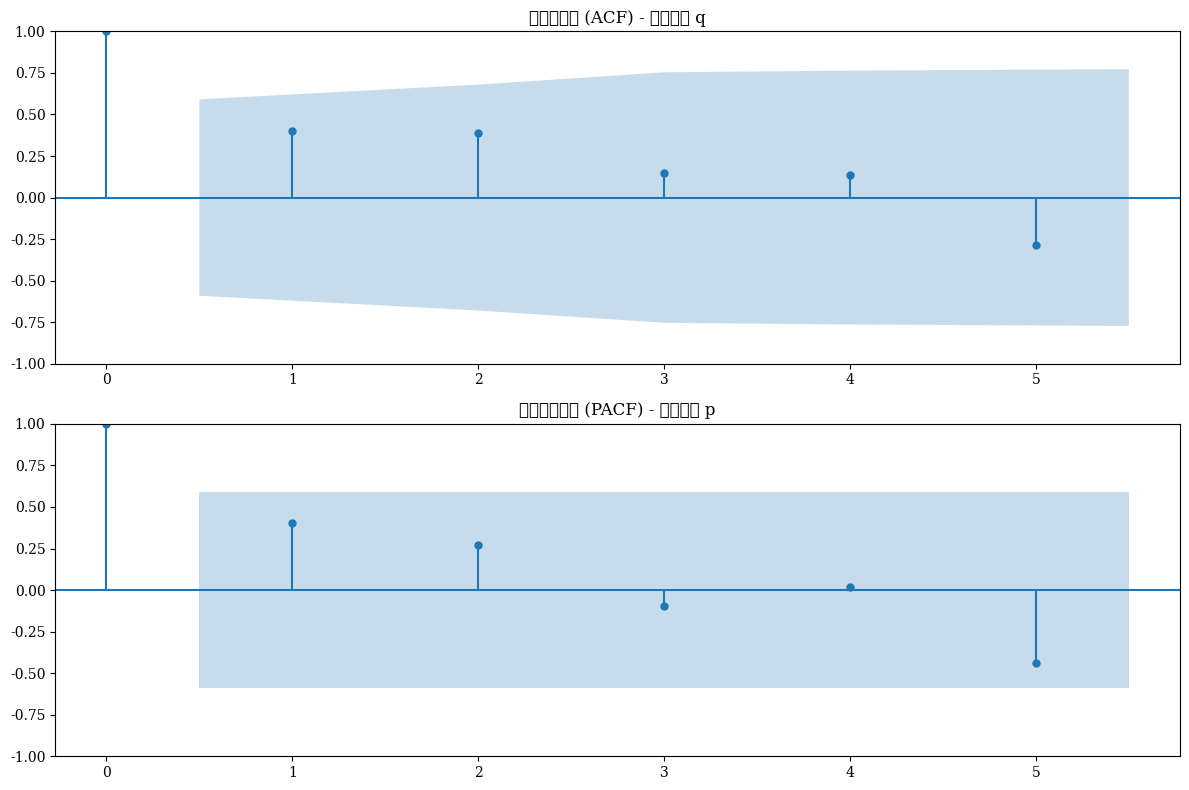

In [57]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
def determine_p_q_parameters(stationary_series, max_lag=10):
    """通过 ACF 和 PACF 图确定 p 和 q"""
    plt.figure(figsize=(12, 8))
    
    # ACF 图来确定 q
    plt.subplot(211)
    plot_acf(stationary_series, ax=plt.gca(), lags=max_lag)
    plt.title('自相关函数 (ACF) - 用于确定 q')
    
    # PACF 图来确定 p
    plt.subplot(212)
    plot_pacf(stationary_series, ax=plt.gca(), lags=max_lag)
    plt.title('偏自相关函数 (PACF) - 用于确定 p')
    
    plt.tight_layout()
    plt.show()
determine_p_q_parameters(c['NDAT'], max_lag=5)


ARIMA模型假设检验

1. 残差正态性检验:
   Shapiro-Wilk检验: 统计量=0.8656, p值=0.0365
   ✗ 残差不呈正态分布


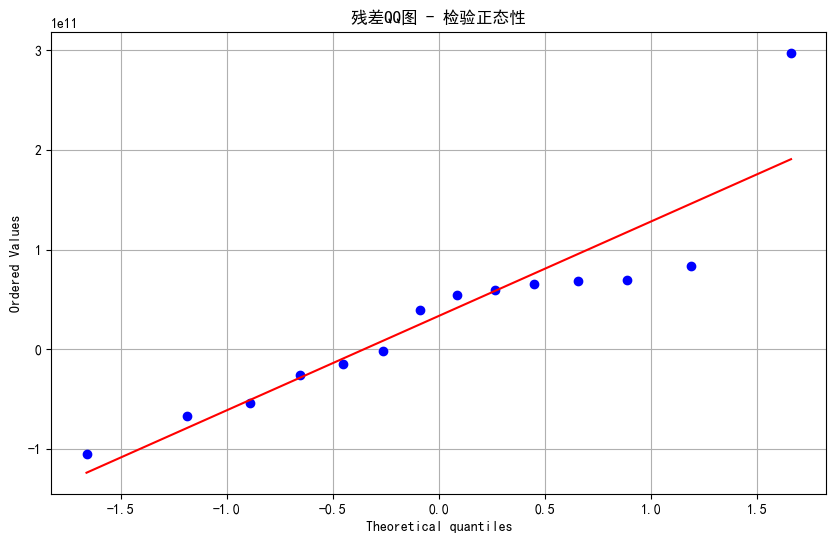


2. 残差白噪声检验:
    lb_stat  lb_pvalue
1  0.463571   0.495960
5  1.541677   0.908211
7  2.239743   0.945389
   ✓ 残差为白噪声，没有显著的自相关性


<Figure size 1000x500 with 0 Axes>

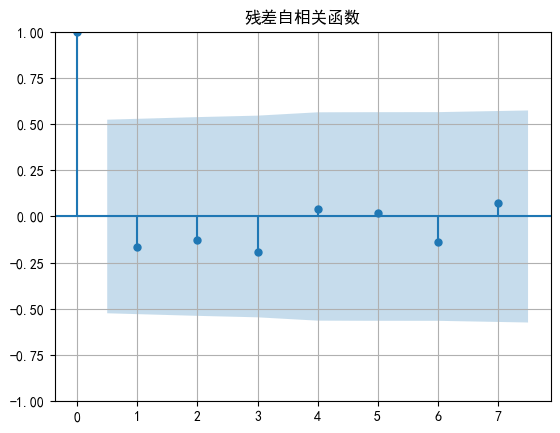


3. 残差同方差性检验:


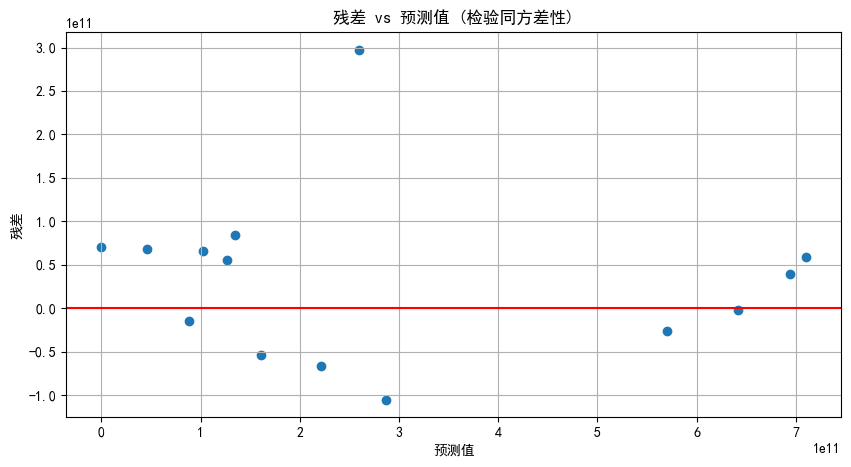


4. 模型参数显著性检验:
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5472     37.831      0.014      0.988     -73.600      74.694
ar.L2          0.0952     10.299      0.009      0.993     -20.090      20.280
ar.L3          0.3214     22.250      0.014      0.988     -43.288      43.931
ma.L1         -0.0679     47.736     -0.001      0.999     -93.628      93.492
ma.L2         -0.7398     39.546     -0.019      0.985     -78.249      76.770
ma.L3         -0.3271     45.897     -0.007      0.994     -90.283      89.629
ma.L4          0.3939     14.470      0.027      0.978     -27.966      28.754
ma.L5          0.3949     27.387      0.014      0.988     -53.282      54.071
ma.L6         -0.4568     23.640     -0.019      0.985     -46.790      45.877
sigma2      1.129e+22   8.35e-21   1.35e+42      0.000    1.13e+22    1.13e+22

5. 模型整体拟合优度:
   AIC: 717.0626
   BIC

In [ ]:
import scipy.stats as stats
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def arima_assumptions_test(results, data, alpha=0.05):
    """
    对ARIMA模型进行全面的假设检验
    
    参数:
    results - ARIMA模型拟合结果
    data - 原始数据序列
    alpha - 显著性水平
    """
    # 获取残差
    resid = results.resid
    
    print("="*50)
    print("ARIMA模型假设检验")
    print("="*50)
    
    # 1. 残差正态性检验 - Shapiro-Wilk检验
    print("\n1. 残差正态性检验:")
    stat, p_value = stats.shapiro(resid)
    print(f"   Shapiro-Wilk检验: 统计量={stat:.4f}, p值={p_value:.4f}")
    if p_value > alpha:
        print("   ✓ 残差呈正态分布")
    else:
        print("   ✗ 残差不呈正态分布")
        
    # 同样使用QQ图
    plt.figure(figsize=(10, 6))
    stats.probplot(resid, plot=plt)
    plt.title("残差QQ图 - 检验正态性")
    plt.grid(True)
    plt.show()
        
    # 2. 残差白噪声检验 - Ljung-Box检验
    print("\n2. 残差白噪声检验:")
    lb_result = acorr_ljungbox(resid, lags=[1, 5, 7], return_df=True)
    print(lb_result)
    
    # 打印结论
    if all(lb_result['lb_pvalue'] > alpha):
        print("   ✓ 残差为白噪声，没有显著的自相关性")
    else:
        print("   ✗ 残差存在自相关性，不符合白噪声假设")
    
    # 绘制残差的ACF图
    plt.figure(figsize=(10, 5))
    plot_acf(resid, lags=7, alpha=alpha)
    plt.title("残差自相关函数")
    plt.grid(True)
    plt.show()
    
    # 3. 残差方差齐性检验（同方差性）
    print("\n3. 残差同方差性检验:")
    plt.figure(figsize=(10, 5))
    plt.scatter(results.fittedvalues, resid)
    plt.axhline(y=0, color='r', linestyle='-')
    plt.title("残差 vs 预测值 (检验同方差性)")
    plt.xlabel("预测值")
    plt.ylabel("残差")
    plt.grid(True)
    plt.show()
    
    # 4. 参数显著性检验
    print("\n4. 模型参数显著性检验:")
    print(results.summary().tables[1])
    
    # 5. 模型整体拟合优度
    print("\n5. 模型整体拟合优度:")
    print(f"   AIC: {results.aic:.4f}")
    print(f"   BIC: {results.bic:.4f}")
    
    # 6. Durbin-Watson检验（检验序列相关性）
    from statsmodels.stats.stattools import durbin_watson
    dw = durbin_watson(resid)
    print(f"\n6. Durbin-Watson检验值: {dw:.4f}")
    if dw < 1.5:
        print("   ✗ 存在正自相关")
    elif dw > 2.5:
        print("   ✗ 存在负自相关")
    else:
        print("   ✓ 无明显自相关")
        
    print("\n==== 假设检验总结 ====")
    valid_assumptions = []
    
    if p_value > alpha:
        valid_assumptions.append("正态性")
    
    if all(lb_result['lb_pvalue'] > alpha):
        valid_assumptions.append("无自相关性")
    
    if 1.5 <= dw <= 2.5:
        valid_assumptions.append("残差独立性")
    
    if len(valid_assumptions) == 3:
        print("模型满足所有主要假设✓")
    else:
        print(f"模型满足的假设: {', '.join(valid_assumptions)}")
        print(f"模型不满足的假设: {'、'.join(set(['正态性', '无自相关性', '残差独立性']) - set(valid_assumptions))}")

# 使用示例
arima_assumptions_test(results, df['asharevalue_ev2'])